## CS445: Computational Photography

### Setup


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# modify to where you store your project data including utils
datadir = "/content/drive/My Drive/Junior Fall Semester/CS 445/Final Project/"

ant_dir = datadir + "source_images/ant/"
bug_dir = datadir + "source_images/bug/"

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read in Images and Apply Gaussian Blur and Stacking

#### This means:
1. Read in all the images
2. Filter and blend the images together

In [28]:
def read_in_ant_imgs(dir):
  # read in the images
  imgs = []
  for i in range(13):
    if (i < 10):
      imgs.append(cv2.imread(dir + 'b_bigbug000' + str(i) + '_croppped.png'))
    else:
      imgs.append(cv2.imread(dir + 'b_bigbug00' + str(i) + '_croppped.png'))

  return imgs

def read_in_bug_imgs(dir):
  # read in the images
  imgs = []
  for i in range(8):
    if (i < 2):
      imgs.append(cv2.imread(dir + 'hf00' + str(5*i) + '.jpg'))
    else:
      imgs.append(cv2.imread(dir + 'hf0' + str(5*i) + '.jpg'))

  return imgs

In [29]:
def naive_blend(imgs, alpha):
  filtered_imgs = []

  # Create a kernel to apply to each image
  kernel = np.ones((5, 5), np.float32)/30

  # Apply a filter to each image
  for img in imgs:
    filtered_imgs.append(cv2.filter2D(img, -1, kernel))

  # Blend the filtered images to simulate a form of "lazy" focus stacking
  # Use the given alpha value for blending

  final_blended_img = filtered_imgs[0]
  for i in range(1, len(filtered_imgs) - 1):
    final_blended_img = cv2.addWeighted(final_blended_img, alpha, filtered_imgs[i], 1 - alpha, 0)

  return final_blended_img

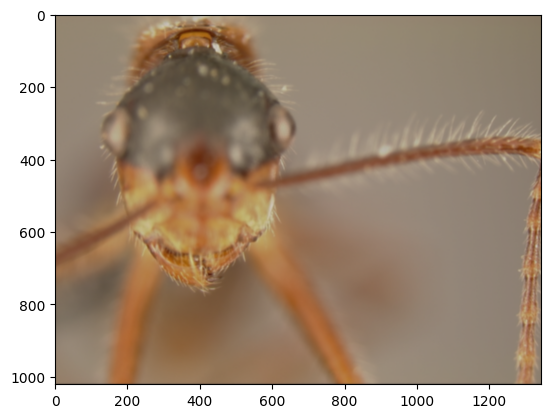

In [30]:
imgs = read_in_ant_imgs(ant_dir)
blended_img = naive_blend(imgs, alpha = 0.5)
plt.imshow(cv2.cvtColor(blended_img, cv2.COLOR_BGR2RGB))

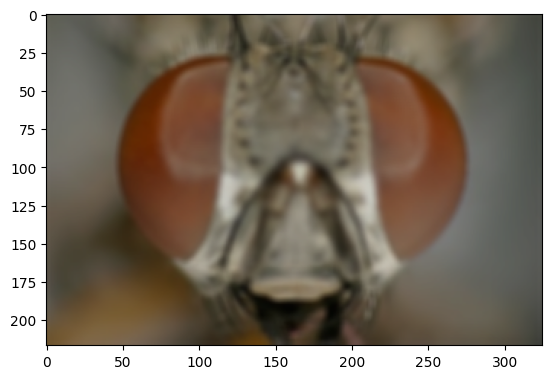

In [33]:
imgs = read_in_bug_imgs(bug_dir)
blended_img = naive_blend(imgs, alpha = 0.5)
plt.imshow(cv2.cvtColor(blended_img, cv2.COLOR_BGR2RGB))